***Hello Guyzzzzzzz and Welcome to Lesson 3 Computer Vision***

In this module we will learn about 

*   Creating your own image dataset using google image search
*   A deeper dive in the concept of Data Augmentation

*   Concept of Overfitting and underfitting





***Before moving further we Should look at Today's demo of data augmentation***

[Demo Video Link](https://drive.google.com/uc?id=1gmREBug5D4mGlcrbG7cjht7_wqWh9xii)

In [10]:
from IPython.display import HTML
HTML(f"""<video src={"https://drive.google.com/uc?id=1gmREBug5D4mGlcrbG7cjht7_wqWh9xii"} width=1200 controls/>""")



# ***Concept 1 creating your own dataset***

***Creating own dataset***

***Step 1***

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

In Google Chrome press CtrlShiftj on Windows/Linux and CmdOptj on macOS, and a small window the javascript 'Console' will appear. In Firefox press CtrlShiftk on Windows/Linux or CmdOptk on macOS. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. Before running the following commands, you may want to disable ad blocking extensions (uBlock, AdBlockPlus etc.) in Chrome. Otherwise the window.open() command doesn't work. Then you can run the following commands:

In [ ]:
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

***When file automatically gets downloaded then make sure to rename the file to appropriate names explained below..***

upload file renamed to ***urls_doreamon.csv***

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving urls_doreamon.csv to urls_doreamon.csv


upload file renamed to ***urls_sinchan.csv***

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving urls_sinchan.csv to urls_sinchan.csv


***Importing required libraries***

In [63]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
img_counter=[]
img_counter.append(10)

***Defining Structure of folder to store data and then downloading the data***

In [ ]:
folder = 'doreamon'
url_file = 'urls_doreamon.csv'
path = Path('my_data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(url_file, dest, max_pics=1000)

In [ ]:
folder = 'sinchan'
url_file = 'urls_sinchan.csv'
path = Path('my_data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(url_file, dest, max_pics=1000)


***Definig classes that data contains Although it is not required for traaining purpose but we will use it for other purposes***

In [ ]:
classes = ['doreamon','sinchan']

***Making sure that every image is readable else image get deleted***

In [ ]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

doreamon


sinchan


***Creating data bunch***

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['doreamon', 'sinchan']

***Looking at the data***

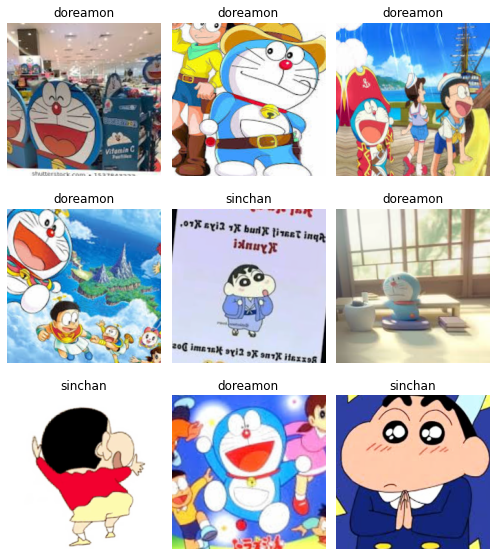

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['doreamon', 'sinchan'], 2, 729, 182)

#***Concept 2 Data Augmentation***

***Introduction***


Data augmentation refers to randomly applying various kinds of transforms to the images in our dataset. These transforms help introduce more variety in our dataset. Let’s see what that means.

Consider an example of building a face lock. When you take samples for the lock you take some photos in the present and you are done. However, the user is not always going to be in the same lighting when he wants to unlock his phone (Brightness). Or, the user won’t always be facing the camera at the same angle (Warp). Maybe his picture appears blur because of some reason(jitter). We need to account for these situations while training our data. And that’s exactly what data augmentation gives us.

***We start with an image like this***

![alt text](https://i.pinimg.com/236x/3f/af/d7/3fafd71b0fc1b94498f70a3a4c848763--shruti-hassan-actress-photos.jpg)

***Kon hai ye upar wali image me ????***
***Agr ni pta to apni GK update karo***

***Getting the required image to our system***

In [2]:
!wget -O "shruti.jpg" "https://i.pinimg.com/236x/3f/af/d7/3fafd71b0fc1b94498f70a3a4c848763--shruti-hassan-actress-photos.jpg"

--2020-07-21 03:40:34--  https://i.pinimg.com/236x/3f/af/d7/3fafd71b0fc1b94498f70a3a4c848763--shruti-hassan-actress-photos.jpg
Resolving i.pinimg.com (i.pinimg.com)... 104.118.221.72, 2600:1402:3800:281::1931, 2600:1402:3800:29f::1931, ...
Connecting to i.pinimg.com (i.pinimg.com)|104.118.221.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14505 (14K) [image/jpeg]
Saving to: ‘shruti.jpg’

shruti.jpg          100%[===================>]  14.17K  --.-KB/s    in 0s      

2020-07-21 03:40:35 (153 MB/s) - ‘shruti.jpg’ saved [14505/14505]



In [23]:
shruti=open_image("shruti.jpg")
shruti.size

torch.Size([354, 236])

***Data augmentation details***

*If you want to quickly get a set of random transforms that have worked well in a wide range of tasks, you should use the get_transforms function. The most important parameters to adjust are do_flip and flip_vert, depending on the type of images you have.*

![alt text](https://miro.medium.com/max/700/1*1Km6zKfQO8cpmOIrRZ3vZw.png)

***Utility func to easily create a list of flip, rotate, zoom, warp, lighting transforms.***

**do_flip**: if True, a random flip is applied with probability 0.5

**flip_vert**: requires do_flip=True. If True, the image can be flipped vertically or rotated by 90 degrees, otherwise only an horizontal flip is applied

**max_rotate**: if not None, a random rotation between -max_rotate and max_rotate degrees is applied with probability p_affine

**max_zoom**: if not 1. or less, a random zoom between 1. and max_zoom is applied with probability p_affine

**max_lighting**: if not None, a random lightning and contrast change controlled by max_lighting is applied with probability p_lighting

**max_warp**: if not None, a random symmetric warp of magnitude between -max_warp and maw_warp is applied with probability p_affine

**p_affine**: the probability that each affine transform and symmetric warp is applied

**p_lighting**: the probability that each lighting transform is applied

**xtra_tfms**: a list of additional transforms you would like to be applied

***This function returns a tuple of two lists of transforms, one for the training set and the other for the validation set (which is limited to a center crop by default).***

In [3]:
tfms = get_transforms()

In [33]:
len(tfms)

2

In [34]:
tfms[0]

[RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True),
 RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True, use_on_y=True),
 RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
 RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
 RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.1), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
 RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
 RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.75, resolved={}, do_run=Tr

***creating a function that can return an image object...***

Ok why we created this function????
maybe I like to create function hahahahhaa
Actually the reason is we will be creating multiple transformations so instead of ensuring that we write same name everywhere I used this just in case we want to change our sample image we can only change it here boooooooom

In [4]:
def get_ex():
  return open_image('shruti.jpg')

***Creating a function that can apply transformations and plot them as well as save them***

***Remember I don't want you to learn all the code present here. What basically required is to understand What is going on and not how it is being done with the code and One more thing I will be exlaining how sometimes you just listen and focus what I am telling and don't go for extra internal functioning now.***

In [64]:
import os
os.makedirs("image_data",exist_ok=True)
def plots_f(rows, cols, width, height, **kwargs):
  total_plots=plt.subplots(rows,cols,figsize=(width,height))[1].flatten()
  for i,ax in enumerate(total_plots):
    get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax)
    plt.savefig("image_data/"+str(img_counter[0])+".jpg")
    img_counter[0]+=1

    
    

***We can always use help function for any function details***

In [22]:
help(get_transforms)

Help on function get_transforms in module fastai.vision.transform:

get_transforms(do_flip:bool=True, flip_vert:bool=False, max_rotate:float=10.0, max_zoom:float=1.1, max_lighting:float=0.2, max_warp:float=0.2, p_affine:float=0.75, p_lighting:float=0.75, xtra_tfms:Union[Collection[fastai.vision.image.Transform], NoneType]=None) -> Collection[fastai.vision.image.Transform]
    Utility func to easily create a list of flip, rotate, `zoom`, warp, lighting transforms.



***let's see what default data augmentation we were doing till now and believe me it works fine nearlly all the time. So in particality when we will be training our model we barely change the defaults***

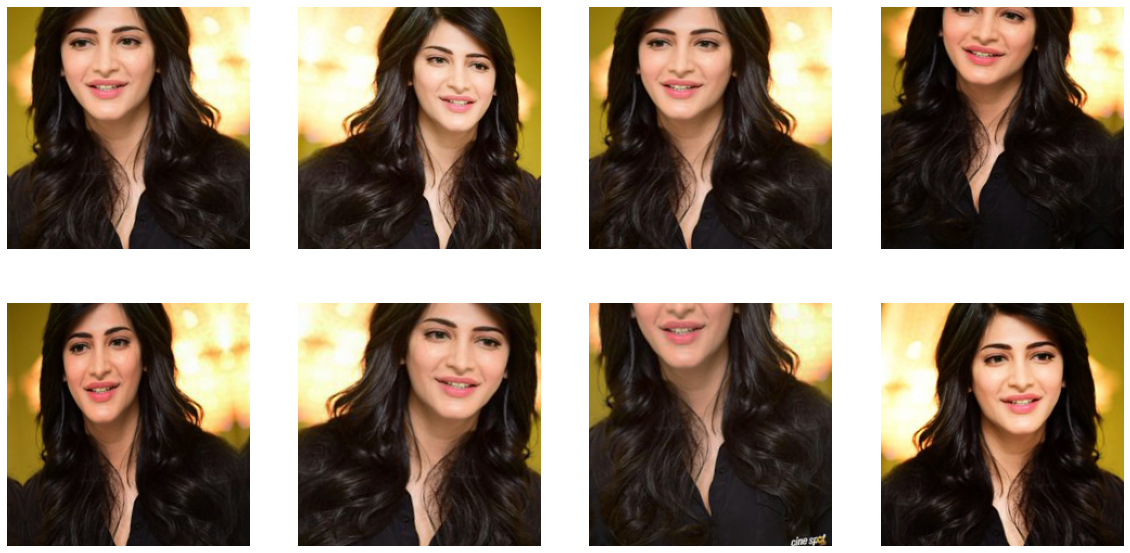

In [65]:
tfms= get_transforms()
my_data=plots_f(2, 4, 20, 10, size=224)

***zoom_crop***

**zoom_crop**(scale:**float**, do_rand:**bool=False**, p:**float=1.0**)

**Randomly zoom and/or crop.**

*   **scale**: Decimal or range of decimals to zoom the image
*  **do_rand:** If true, transform is randomized, otherwise it's a zoom of scale and a center crop
*   **p**: Probability to apply the zoom



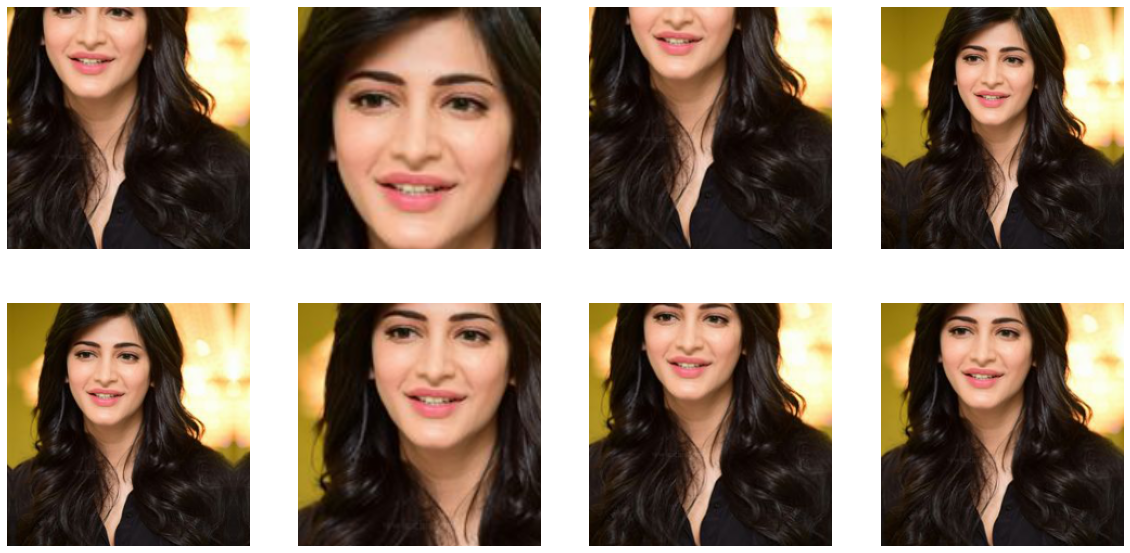

In [66]:
tfms = zoom_crop(scale=(0.75,2), do_rand=True)
plots_f(2, 4, 20, 10, size=224)

In [8]:
tfms[0]

RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (0.75, 2), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=1.0, resolved={'scale': 0.7686198730945502, 'row_pct': 0.8159400123082607, 'col_pct': 0.12942336225177054}, do_run=True, is_random=True, use_on_y=True)

***rand_resize_crop***

**rand_resize_crop**(size:**int**, max_scale:**float=2.0**, ratios:**Point=(0.75, 1.33)**)

Randomly resize and crop the image to a ratio in ratios after a zoom of max_scale.

**size:** Final size of the image

**max_scale:** Zooms the image to a random scale up to this

**ratios:** Range of ratios in which a new one will be randomly picked

***This transform is an implementation of the main approach used for nearly all winning Imagenet entries since 2013***

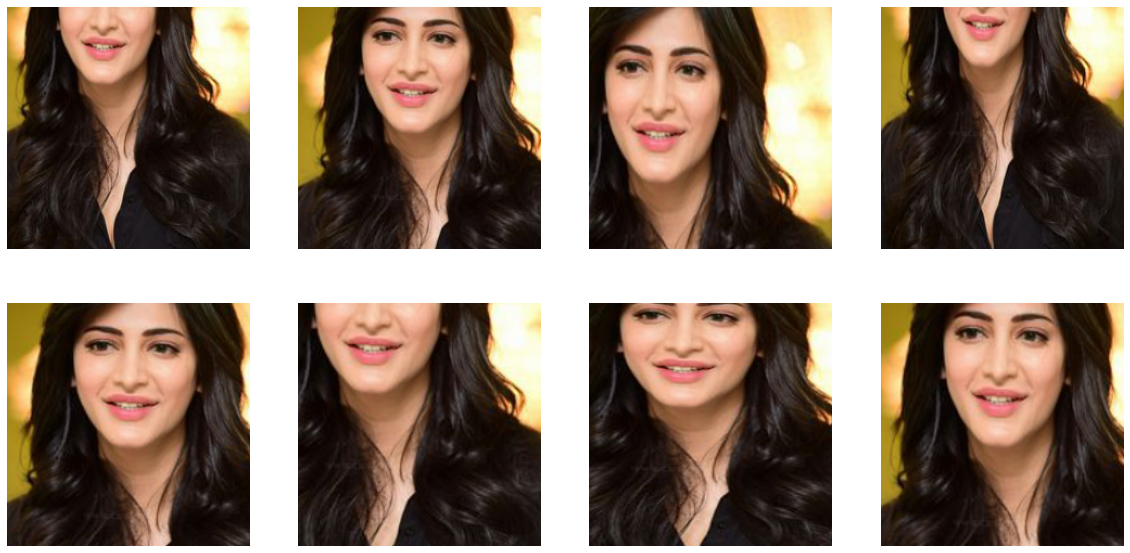

In [67]:
# random resize and crop
tfms = [rand_resize_crop(224)]
plots_f(2, 4, 20, 10, size=224)

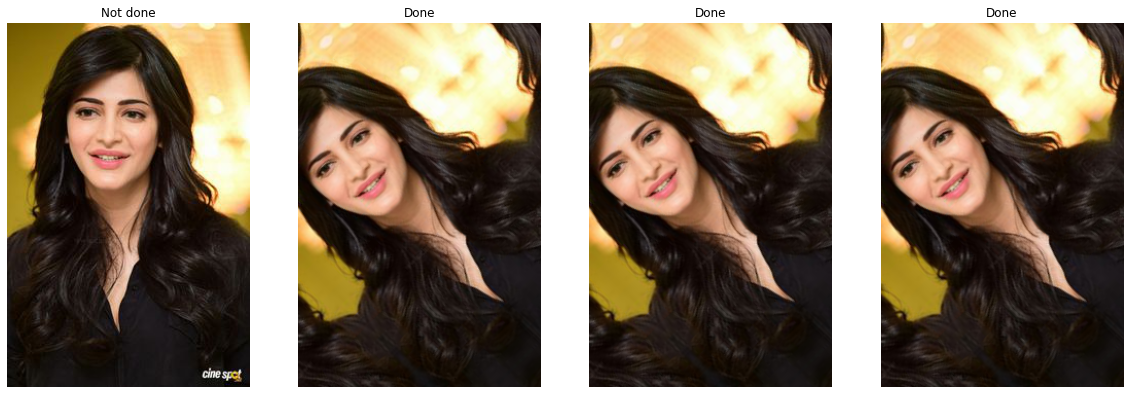

In [72]:
# passing a probability to a function
tfm = [rotate(degrees=45, p=0.5)]
fig, axs = plt.subplots(1,4,figsize=(20,10))
for ax in axs:
    img = get_ex().apply_tfms(tfm)
    title = 'Done' if tfm[0].do_run else 'Not done'
    img.show(ax=ax, title=title)
    plt.savefig("image_data/"+str(img_counter[0])+".jpg")
    img_counter[0]+=1

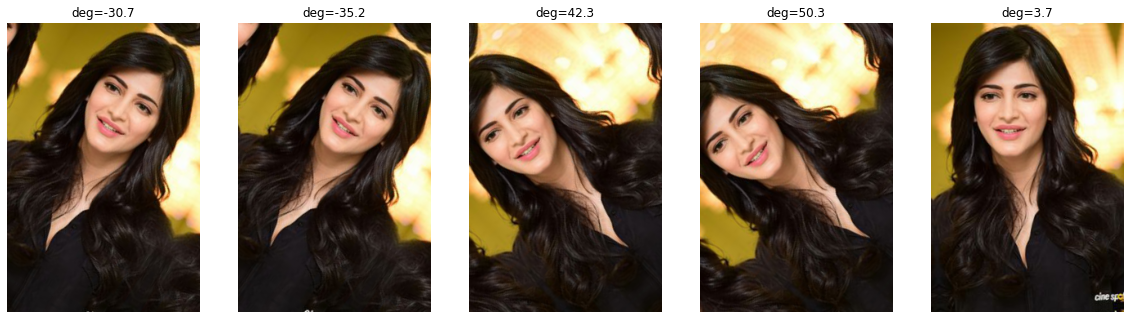

In [73]:
tfm = [rotate(degrees=(-60,60))]
fig, axs = plt.subplots(1,5,figsize=(20,10))
for ax in axs:
    img = get_ex().apply_tfms(tfm)
    title = f"deg={tfm[0].resolved['degrees']:.1f}"
    img.show(ax=ax, title=title)
    plt.savefig("image_data/"+str(img_counter[0])+".jpg")
    img_counter[0]+=1

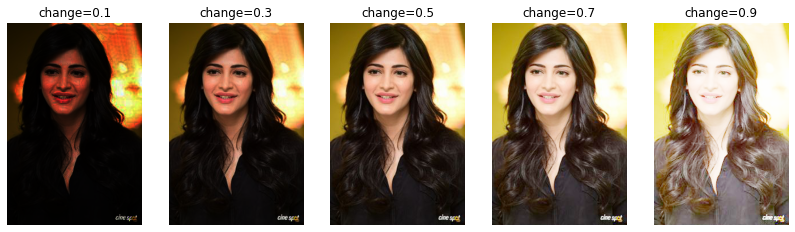

In [74]:
# brightness
fig, axs = plt.subplots(1,5,figsize=(14,8))
for change, ax in zip(np.linspace(0.1,0.9,5), axs):
    brightness(get_ex(), change).show(ax=ax, title=f'change={change:.1f}')
    plt.savefig("image_data/"+str(img_counter[0])+".jpg")
    img_counter[0]+=1

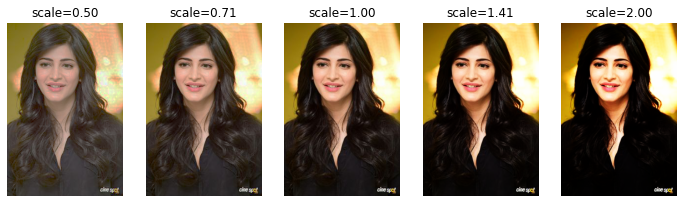

In [75]:
# contrast
fig, axs = plt.subplots(1,5,figsize=(12,4))
for scale, ax in zip(np.exp(np.linspace(log(0.5),log(2),5)), axs):
    contrast(get_ex(), scale).show(ax=ax, title=f'scale={scale:.2f}')
    plt.savefig("image_data/"+str(img_counter[0])+".jpg")
    img_counter[0]+=1

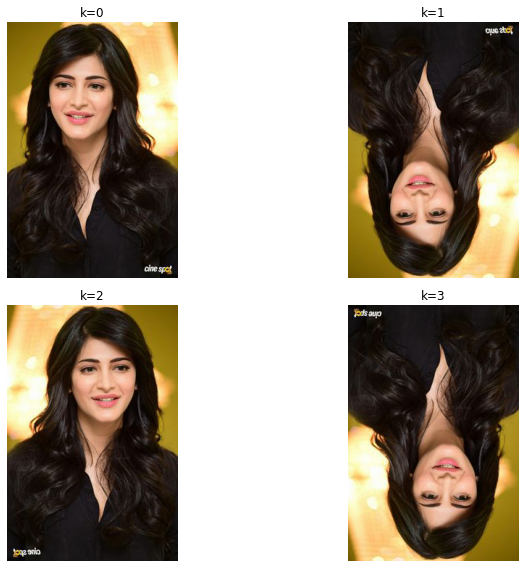

In [76]:
# dihedral
fig, axs = plt.subplots(2,2,figsize=(12,8))
for k, ax in enumerate(axs.flatten()):
    dihedral(get_ex(), k).show(ax=ax, title=f'k={k}')
    plt.savefig("image_data/"+str(img_counter[0])+".jpg")
    img_counter[0]+=1
plt.tight_layout()


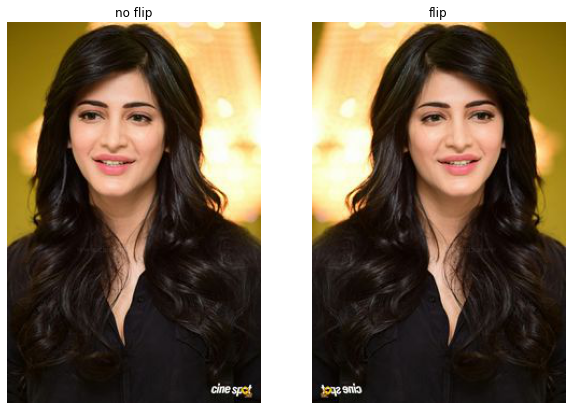

In [77]:
fig, axs = plt.subplots(1,2,figsize=(10,8))
get_ex().show(ax=axs[0], title=f'no flip')
flip_lr(get_ex()).show(ax=axs[1], title=f'flip')
plt.savefig("image_data/"+str(img_counter[0])+".jpg")
img_counter[0]+=1

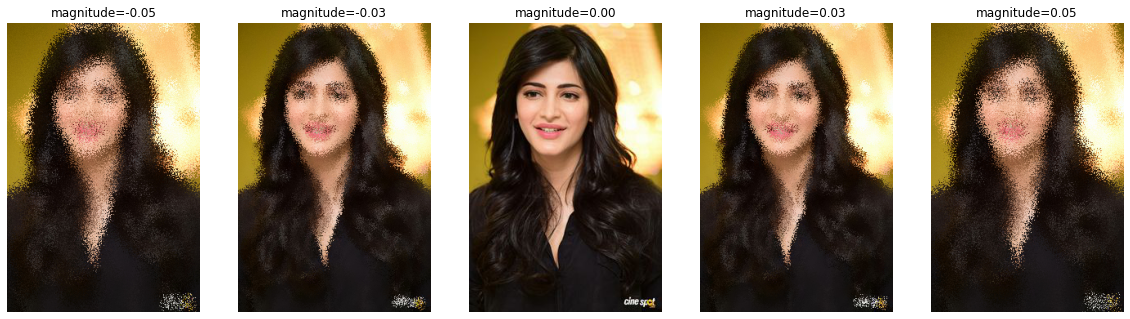

In [78]:
# jitter
fig, axs = plt.subplots(1,5,figsize=(20,8))
for magnitude, ax in zip(np.linspace(-0.05,0.05,5), axs):
    tfm = jitter(magnitude=magnitude)
    get_ex().jitter(magnitude).show(ax=ax, title=f'magnitude={magnitude:.2f}')
    plt.savefig("image_data/"+str(img_counter[0])+".jpg")
    img_counter[0]+=1

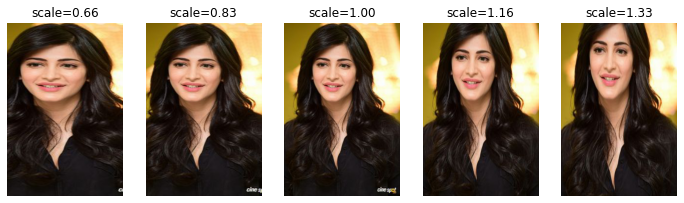

In [79]:
# squish
fig, axs = plt.subplots(1,5,figsize=(12,4))
for scale, ax in zip(np.linspace(0.66,1.33,5), axs):
    get_ex().squish(scale=scale).show(ax=ax, title=f'scale={scale:.2f}')
    plt.savefig("image_data/"+str(img_counter[0])+".jpg")
    img_counter[0]+=1

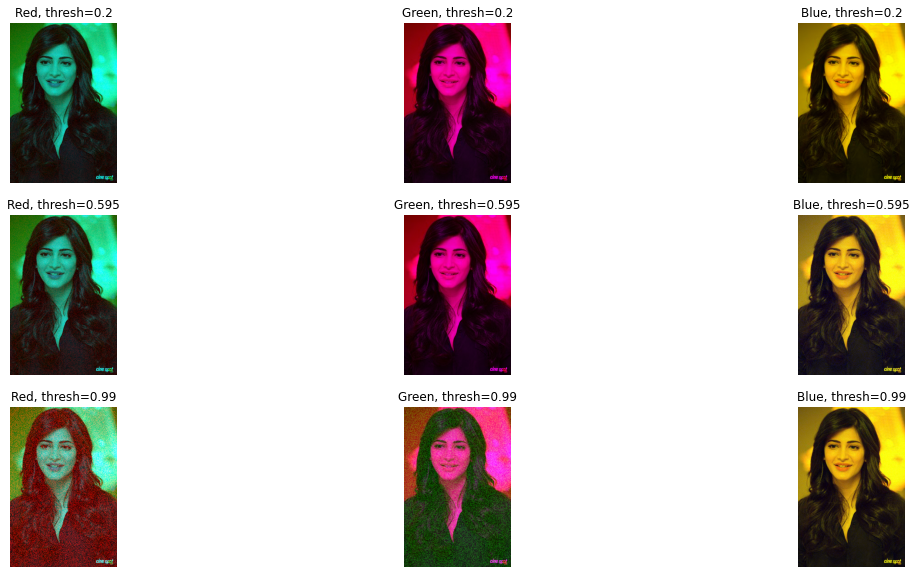

In [80]:
#rgb_randomize
fig, axs = plt.subplots(3,3,figsize=(20,10))
channels = ['Red', 'Green', 'Blue']

for i in np.arange(0, 3):
    for thresh, ax in zip(np.linspace(0.2, 0.99, 3), axs[:, i]):
        get_ex().rgb_randomize(channel = i, thresh = thresh).show(
            ax=ax, title = f'{channels[i]}, thresh={thresh}')

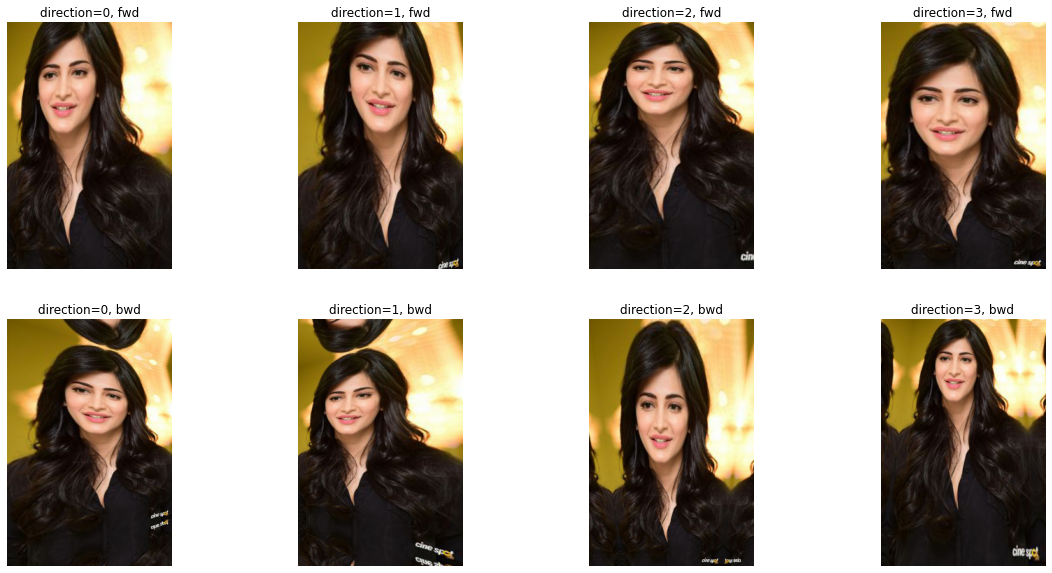

In [81]:
# tilt
fig, axs = plt.subplots(2,4,figsize=(20,10))
for i in range(4):
    get_ex().tilt(i, 0.4).show(ax=axs[0,i], title=f'direction={i}, fwd')
    get_ex().tilt(i, -0.4).show(ax=axs[1,i], title=f'direction={i}, bwd')

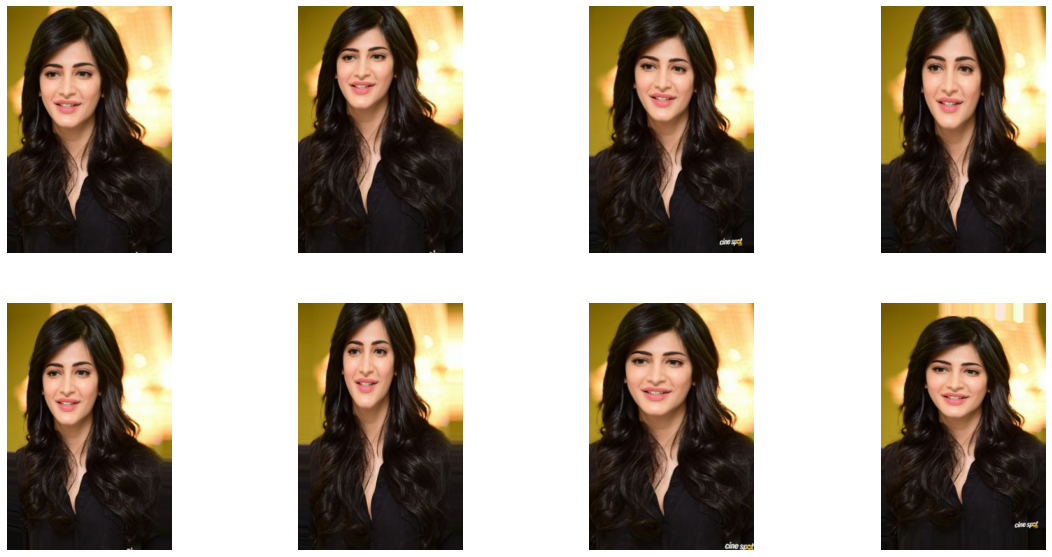

In [82]:
# symm warp
tfm = symmetric_warp(magnitude=(-0.2,0.2))
_, axs = plt.subplots(2,4,figsize=(20,10))
for ax in axs.flatten():
    img = get_ex().apply_tfms(tfm, padding_mode='border')
    img.show(ax=ax)

***Creating video***

In [84]:
%cd "image_data"
!ffmpeg -framerate 1 -pattern_type glob -i '*.jpg' -s 1920x1080  \-c:v libx264 -r 1 -pix_fmt yuv420p ../my_final_output.mp4
%cd ..

/content/image_data
ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --

***Downloading audio***

In [1]:
!wget -O "song.mp3" "https://pagalsong.in/uploads/systemuploads/mp3/Batti%20Gul%20Meter%20Chalu/Dekhte%20Dekhte%20(Batti%20Gul%20Meter%20Chalu)%20128%20Kbps.mp3"

--2020-07-21 10:16:43--  https://pagalsong.in/uploads/systemuploads/mp3/Batti%20Gul%20Meter%20Chalu/Dekhte%20Dekhte%20(Batti%20Gul%20Meter%20Chalu)%20128%20Kbps.mp3
Resolving pagalsong.in (pagalsong.in)... 104.27.139.65, 104.27.138.65, 172.67.209.19, ...
Connecting to pagalsong.in (pagalsong.in)|104.27.139.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4152505 (4.0M) [audio/mpeg]
Saving to: ‘song.mp3’

song.mp3            100%[===================>]   3.96M  1.78MB/s    in 2.2s    

2020-07-21 10:16:46 (1.78 MB/s) - ‘song.mp3’ saved [4152505/4152505]



In [2]:
!wget -O "video.mp4" "https://drive.google.com/uc?id=125FIVsQk31efXZYZKY0Mk4vus_AYa0uC"

--2020-07-21 10:17:58--  https://drive.google.com/uc?id=125FIVsQk31efXZYZKY0Mk4vus_AYa0uC
Resolving drive.google.com (drive.google.com)... 108.177.125.101, 108.177.125.102, 108.177.125.138, ...
Connecting to drive.google.com (drive.google.com)|108.177.125.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vcbi7e1cikeishkqonh8395fvc8q40pk/1595326650000/00325710883449936626/*/125FIVsQk31efXZYZKY0Mk4vus_AYa0uC [following]
--2020-07-21 10:17:58--  https://doc-0c-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vcbi7e1cikeishkqonh8395fvc8q40pk/1595326650000/00325710883449936626/*/125FIVsQk31efXZYZKY0Mk4vus_AYa0uC
Resolving doc-0c-ag-docs.googleusercontent.com (doc-0c-ag-docs.googleusercontent.com)... 74.125.23.132, 2404:6800:4008:c02::84
Connecting to doc-0c-ag-docs.googleusercontent.com (doc-0c-ag-docs.googleusercontent.com)|74.

In [4]:
!ffmpeg  -i "video.mp4" -ss 0:0:57 -t 58 -i "song.mp3" -map 0:v:0 -map 1:a:0 -y out.mp4

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [5]:
!pip install -U kora
from kora.drive import upload_public

In [6]:
url = upload_public('out.mp4')

In [7]:
from IPython.display import HTML
HTML(f"""<video src={url} width=1200 controls/>""")

In [9]:
url

'https://drive.google.com/uc?id=1gmREBug5D4mGlcrbG7cjht7_wqWh9xii'

What we do is, 

instead of feeding the model with the same pictures every time, we do small random transformations (a bit of rotation, zoom, translation, etc…) that doesn’t change what’s inside the image (for the human eye) but changes its pixel values. Models trained with data augmentation will then generalize better.

***Data augmentation is also useful in situations when you have a relatively small number of training samples.***

***Training model with default data augmentation parameters***

***We don't need to focus more on training part right now  in this lesson ***

So why I did this????

just for fun hahahahhaahaha
No I want you guyz to train and try predictions for single images like we did in Lesson 2 but don"t bother about creating videos or something right now..

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(8)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
os.makedirs("/content/drive/My Drive/dl_projects/sinora",exist_ok=True)

In [ ]:
my_dir="/content/drive/My Drive/dl_projects/sinora"

In [ ]:
learn.save(my_dir+"/Stage-1")

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(8)

In [ ]:
learn.save(my_dir+"/Stage-2")

# ***Concept 3 Overfitting and Underfitting***

- Most of the time things will train fine with the defaults
- There's not much you really need to tune (despite what you've heard!)
- Most likely are
  - Learning rate
  - Number of epochs

***OverFitting and underfitting***

![alt text](https://miro.medium.com/max/1648/1*JZbxrdzabrT33Yl-LrmShw.png)


All of statistics is about how you use information from a specific sample to make general statements about a larger population (that you cannot observe in full).

***Overfitting ***is when your conclusion is too specific to the observed sample, i.e. not general enough. You usually cure over-fitting by reducing the complexity of your model.

***Underfitting ***is when your conclusion is too general - that means you’re not learning enough from your sample. You usually cure under-fitting by increasing the complexity of your model.

Example: predict who will be an “A” student in college.

Let’s say “Rohan” is an “A” student in your dataset. If your model says anyone named “Rohan” is an “A” student, the model will correctly predict this specific student but it is over-fitted because in the general population, there probably isn’t another “Rohan” (and if there is, probably not an “A” student).

If your model says anyone who graduated from [insert top high school] will be an “A” student in college, this is underfitting (too general). Within the graduates from that high school, there will be a range of college GPAs - what else can explain who gets the “A”?